In [154]:
import pandas as pd
import numpy as np
import sys, os
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

In [5]:
dataset = pd.read_pickle("../data/all_tickers_last_decade_features.pkl")

In [6]:
dataset.shape

(869435, 27)

### Tendencia
GGAL (USD) observa una tendencia que cambia de signo a partir de principios de 2018

In [96]:
ggal_5y = dataset.loc[(dataset.Year > 2015) & (dataset.Ticker == 'GGAL'),['Adj Close']]

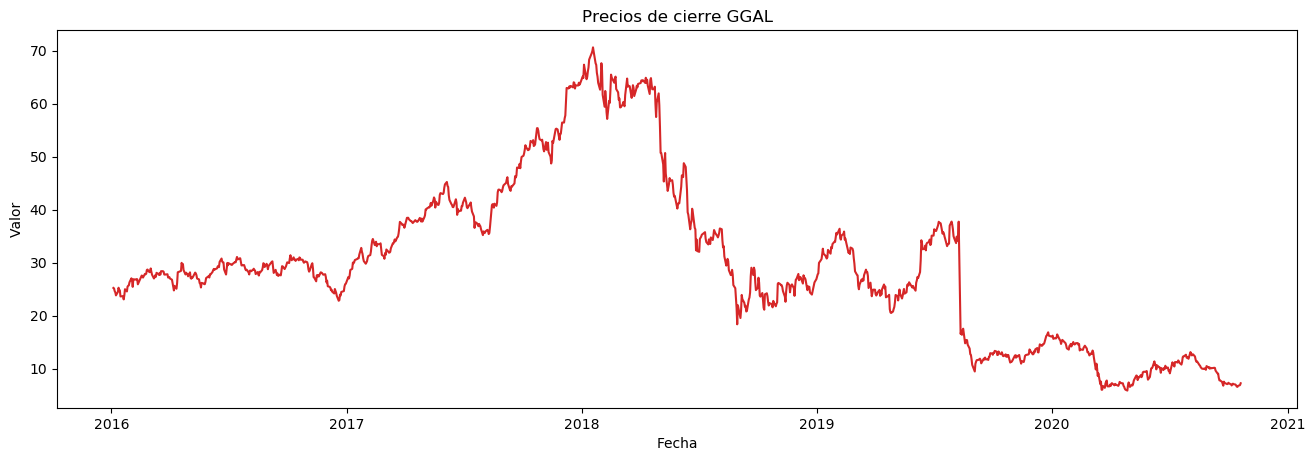

In [98]:
def plot_df(df, x, y, title="", xlabel='Fecha', ylabel='Valor', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(ggal_5y, x=ggal_5y.index, y=ggal_5y.loc[:,'Adj Close'], title='Precios de cierre GGAL')

### Estacionalidad
GGAL (USD) no presenta estacionalidad mensual

In [100]:
# Preparamos los datos:
ggal_5y['year'] = [d.year for d in ggal_5y.index]
ggal_5y['month'] = [d.strftime('%b') for d in ggal_5y.index]
years = ggal_5y['year'].unique()

In [147]:
# ¿Cuál es el último día registrado del mes?
ggal_5y.groupby(ggal_5y.index.to_period('M')).apply(lambda x: x.index.day.max()).head(12)

Date
2016-01    29
2016-02    29
2016-03    31
2016-04    29
2016-05    31
2016-06    30
2016-07    29
2016-08    31
2016-09    30
2016-10    31
2016-11    30
2016-12    30
Freq: M, dtype: int64

In [137]:
# Precio de cierre al ultimo día registrado del mes
ggal_last = ggal_5y.iloc[ggal_5y.reset_index().groupby(ggal_5y.index.to_period('M'))['Adj Close'].idxmax()]

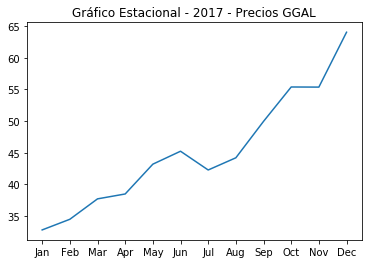

In [149]:
plt.plot('month', 'Adj Close', data=ggal_last.loc[ggal_last.year==2017, :])
plt.title("Gráfico Estacional - 2017 - Precios GGAL");
plt.show()

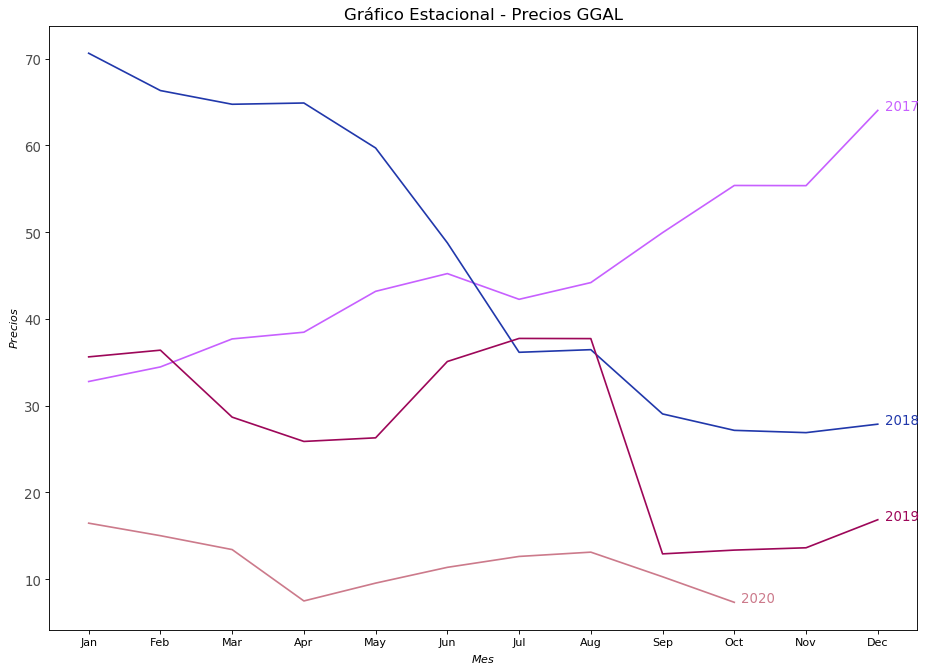

In [152]:
# Preparamos los colores:
np.random.seed(100)
mycolors = np.random.choice(list(mpl.colors.XKCD_COLORS.keys()), len(years), replace=False)

# Ploteamos
plt.figure(figsize=(14,10), dpi= 80)
for i, y in enumerate(years):
    if i > 0:        
        plt.plot('month', 'Adj Close', data=ggal_last.loc[ggal_last.year==y, :], color=mycolors[i], label=y) # grafica los 12 meses de cada año
        plt.text(ggal_last.loc[ggal_last.year==y, :].shape[0]-.9, ggal_last.loc[ggal_last.year==y, 'Adj Close'][-1:].values[0], y, fontsize=12, color=mycolors[i])


plt.gca().set(ylabel='$Precios$', xlabel='$Mes$')
plt.yticks(fontsize=12, alpha=.7)
plt.title("Gráfico Estacional - Precios GGAL", fontsize=15);

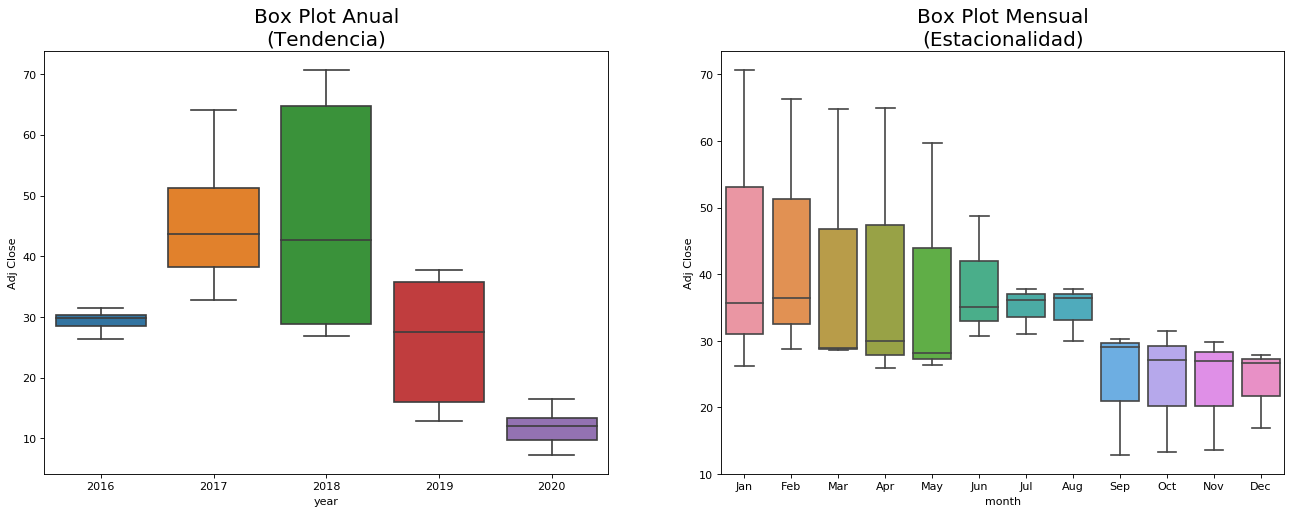

In [156]:
# Definimos los plots:
fig, axes = plt.subplots(1, 2, figsize=(20,7), dpi= 80)
sns.boxplot(x='year', y='Adj Close', data=ggal_last, ax=axes[0])
sns.boxplot(x='month', y='Adj Close', data=ggal_last.loc[~ggal_last.year.isin([2017, 2020]), :])

# Seteamos los títulos:
axes[0].set_title('Box Plot Anual\n(Tendencia)', fontsize=18); 
axes[1].set_title('Box Plot Mensual\n(Estacionalidad)', fontsize=18);